In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('House_train_raw.csv')

In [388]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## ANÁLISIS EXPLORATORIO DE DATOS

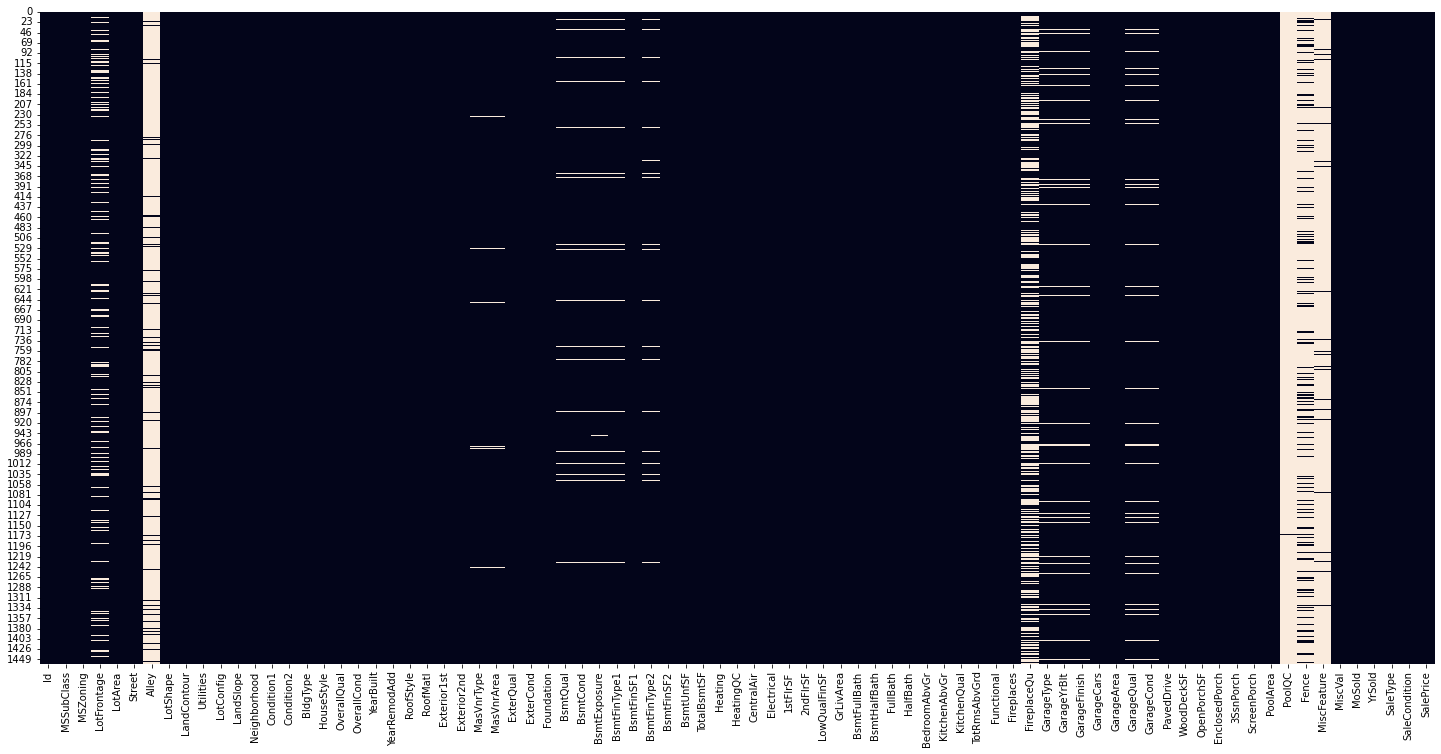

In [4]:
 #Graficamos dónde se encuentran los valores faltantes

plt.figure(figsize= (25,12))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [69]:
# Con una máscara, nos traemos todos los registros donde haya al menos una instancia con nulo en alguna columna

data[pd.isnull(data).any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [122]:
porcentaje_faltantes_alley = (data['Alley'].isnull().sum() / data.shape[0]) * 100
print('El total de faltantes para la columna Alley es de : ', round(porcentaje_faltantes_alley), '%')

El total de faltantes para la columna Alley es de :  94 %


In [39]:
# dropeamos esta columna, que practicamente no tiene valores

data.drop(columns = 'Alley', inplace = True)

In [125]:
porcentaje_faltantes_fireplacequ = (data['FireplaceQu'].isnull().sum() / data.shape[0]) * 100
print('El total de faltantes para la columna FireplaceQu es de : ', round(porcentaje_faltantes_fireplacequ), '%')

El total de faltantes para la columna FireplaceQu es de :  47 %


In [40]:
# Dropeamos esta columna también, ya que casi la mitad no tiene registros y además la información que brinda es intrascendente

data.drop(columns = 'FireplaceQu', inplace = True)

In [127]:
# Observamos cuántas columnas nos quedan con valores faltantes

print('El total de columnas con valores faltantes es : ' , (data.isnull().sum() > 0).sum())

El total de columnas con valores faltantes es :  17


In [7]:
data.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Fence           1179
LotFrontage      259
GarageFinish      81
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageType        81
BsmtFinType2      38
dtype: int64

**Las primeras 3 columnas listadas anteriormente también están pobladas de nulos casi en su totalidad. Las dropeamos**

`PoolQC` hace referencia a la calidad de la piscina. Probablemente la gran cantidad de faltantes se deba a que son viviendas sin piscina. Otra opción sería cambiar los faltantes por 'not pool'.

Ahora bien, como ya tenemos PoolArea podemos desde ahí considerar que los que tienen valor 0 son viviendas sin piscina. Quizás con esa columna sea suficiente para considerar lo respectivo a la pileta. Probablemente sea más determinante si una vivieda tiene o no pileta, en vez de la calidad de ella. 

In [5]:
# Comprobamos, a través del paradigma MAR de los valores faltantes, la relación entre los nulos de PoolQC con los valores en PoolArea.

# Oservamos que los faltantes en PoolQC corresponden a todos los valores que son cero en PoolArea. 

data.PoolQC.isnull().groupby([data['PoolArea']]).sum().astype(int).reset_index(name='count')

,PoolArea,count
0,0,1453
1,480,0
2,512,0
3,519,0
4,555,0
5,576,0
6,648,0
7,738,0


In [9]:
# Es tan poca la información, ya que solo 7 viviendas tienen piscina, que la columna referente a la calidad de ellas las dropearemos

data['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [41]:
data.drop(columns = ['PoolQC', 'MiscFeature', 'Fence'], inplace=True)

In [20]:
# Evaluamos las correlaciones respecto al precio

corr = data.corr()

#Nos quedamos con las columnas que tienen una correlación respecto al precio mayor a 0.3 o menor a -0.3

(corr.tail(1) > 0.3).sum()

Id               0
MSSubClass       0
LotFrontage      1
LotArea          0
OverallQual      1
OverallCond      0
YearBuilt        1
YearRemodAdd     1
MasVnrArea       1
BsmtFinSF1       1
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      1
1stFlrSF         1
2ndFlrSF         1
LowQualFinSF     0
GrLivArea        1
BsmtFullBath     0
BsmtHalfBath     0
FullBath         1
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     1
Fireplaces       1
GarageYrBlt      1
GarageCars       1
GarageArea       1
WoodDeckSF       1
OpenPorchSF      1
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        1
dtype: int64

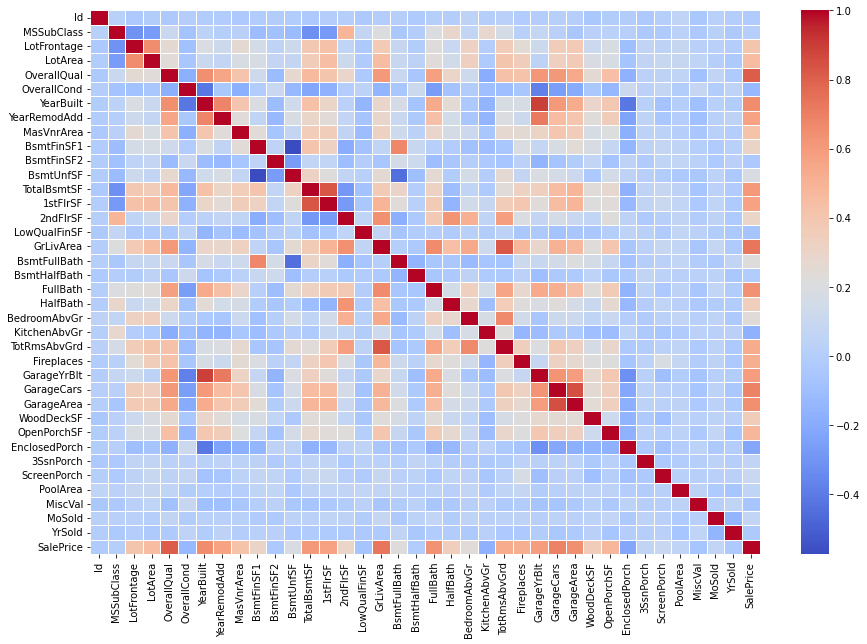

In [340]:
# Realizamos un mapa de calor para observar correlaciones

plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap= 'coolwarm', linewidth = 0.5)
plt.show()

#### A continuación, de las columnas cuantitativas nos quedaremos solamente con las que tienen una correlación con SalePrice (Pearson, Kendall o Spearman) mayores a 0.3 o menores a -0.3

In [42]:
tipos_corr= ['pearson', 'kendall', 'spearman']
lista_columns = []

In [43]:
corr = data.corr('pearson')
per = (corr.SalePrice[(corr.SalePrice > 0.3) | (corr.SalePrice < -0.3)])
per = pd.DataFrame(per)
per['columns'] = per.index
per.reset_index(drop=True, inplace= True)
lista_columns.append(per['columns'].tolist())

In [44]:
corr = data.corr('kendall')
ken = (corr.SalePrice[(corr.SalePrice > 0.3) | (corr.SalePrice < -0.3)])
ken = pd.DataFrame(ken)
ken['columns'] = ken.index
ken.reset_index(drop=True, inplace= True)

In [45]:
corr = data.corr('spearman')
spe = (corr.SalePrice[(corr.SalePrice > 0.3) | (corr.SalePrice < -0.3)])
spe = pd.DataFrame(spe)
spe['columns'] = spe.index
spe.reset_index(drop=True, inplace= True)

Sumar a la correlación Perason las columnas LotArea (por correlación kendall) y HalfBath (por correlación spearman)

In [46]:
lista_columns.append(['LotArea', 'HalfBath'])

In [12]:
lista_columns

[['LotFrontage',
  'OverallQual',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'GrLivArea',
  'FullBath',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'SalePrice'],
 ['LotArea', 'HalfBath']]

In [47]:
# Tenemos que omitir la última sublista y agregar todo como una lista única

import itertools
lista_columns = list(itertools.chain(*lista_columns))

In [48]:
data = pd.DataFrame(data, columns= lista_columns)

## Luego, deberíamos incorporar las columnas categóricas

#### Pasamos a explorar un poco las columnas

In [12]:
# TIPO DE VIVIENDA

data['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

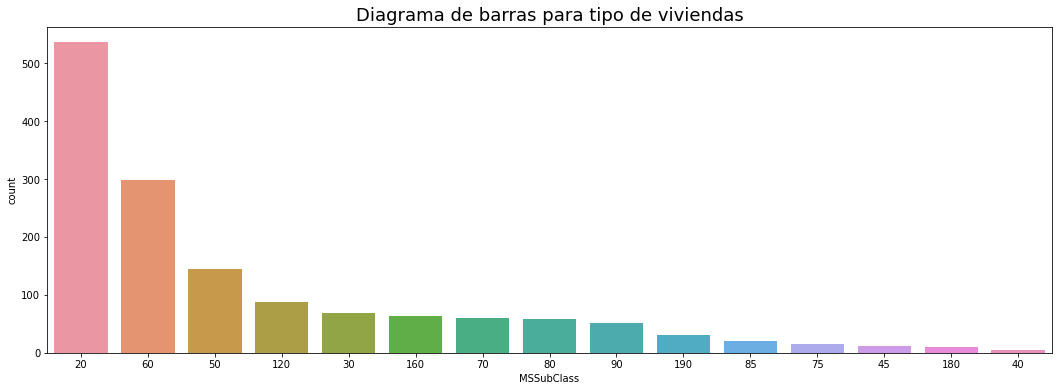

In [28]:
plt.figure(figsize= (18,6))
sns.countplot(x = 'MSSubClass', data = data, order = data['MSSubClass'].value_counts().index)
plt.title('Diagrama de barras para tipo de viviendas', fontsize = 18)
plt.show()

*La mayoría de las viviendas corresponden a las categorías 20 y 60, que son viviendas posteriores a 1946*

In [10]:
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

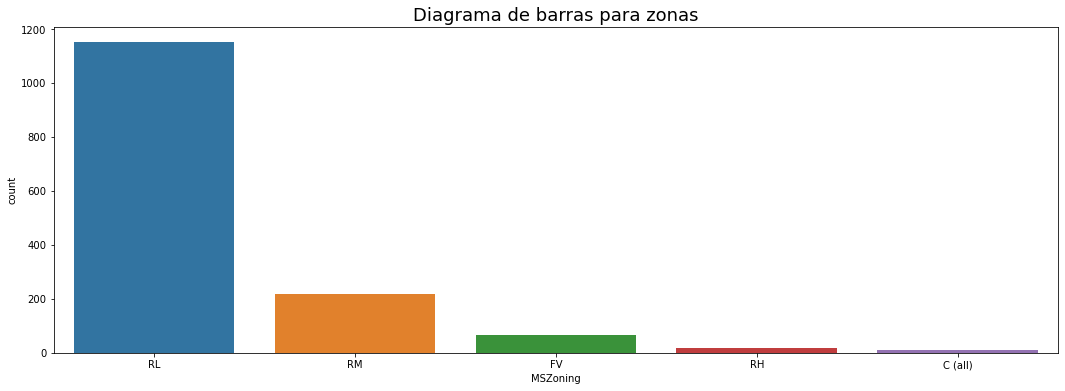

In [29]:
plt.figure(figsize= (18,6))
sns.countplot(x = 'MSZoning', data = data, order = data['MSZoning'].value_counts().index)
plt.title('Diagrama de barras para zonas', fontsize = 18)
plt.show()

# Observamos que la mayoría de las viviendas se encuentran en zonas residenciales de baja densidad

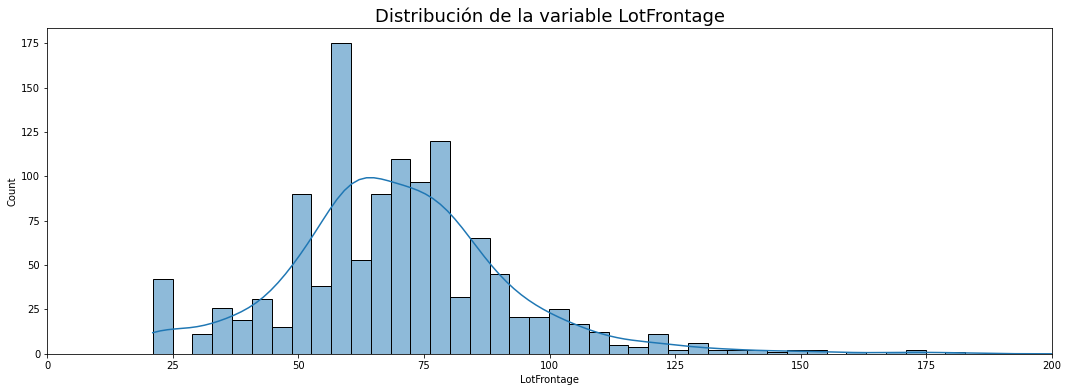

In [114]:
plt.figure(figsize= (18,6))
sns.histplot(data['LotFrontage'], kde = True)
plt.title('Distribución de la variable LotFrontage', fontsize = 18)
plt.xlim([0,200])
plt.show()

In [62]:
data_sinnan = data.dropna()

## Escalado de datos

In [63]:
data_sinnan.reset_index(inplace=True, drop = True)

In [64]:
data_sinnan.head(5)

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,LotArea,HalfBath
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,...,8,0,2003.0,2,548,0,61,208500,8450,1
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,...,6,1,1976.0,2,460,298,0,181500,9600,0
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,...,6,1,2001.0,2,608,0,42,223500,11250,1
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,...,7,1,1998.0,3,642,0,35,140000,9550,0
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,...,9,1,2000.0,3,836,192,84,250000,14260,1


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()

#Para estandarizar, debo quedarme solamente con las variables de entrada que contienen atributos cuantitativos. 
# A su vez, la variable de salida no debemos escalarla


data_scaled = data_sinnan.drop(columns = 'SalePrice')

data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns = data_scaled.columns)

In [66]:
data_scaled.head(2)

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,LotArea,HalfBath
0,-0.233570,0.570704,0.992930,0.823953,0.462009,0.571581,-0.496377,-0.822753,1.142290,0.341150,0.762485,0.895154,-0.955163,0.953084,0.185499,0.235641,-0.760257,0.231036,-0.205885,1.240077
1,0.384834,-0.153825,0.120665,-0.460746,-0.572748,1.152559,0.415045,0.229055,-0.805853,-0.514644,0.762485,-0.362324,0.626429,-0.092969,0.185499,-0.224712,1.686090,-0.716739,-0.064358,-0.765877


In [67]:
# volvemos a incoportar al dataset el atributo de salida 'y' 

data_scaled = data_scaled.join(data_sinnan['SalePrice'])

# Prueba de modelos

In [72]:
# Elegimos los atributos predictores y la variable a predecir

X = data_scaled.drop("SalePrice", axis=1)
y = data_scaled.SalePrice

In [74]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [75]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 5
reg_knn = KNeighborsRegressor(n_neighbors = n_neighbors )

In [76]:
reg_knn.fit(X_train,y_train)

KNeighborsRegressor()

In [77]:
y_train_pred = reg_knn.predict(X_train)
y_test_pred = reg_knn.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score

In [80]:
print('La precisión del modelo de árbol de decisión en set de train es:', reg_knn.score (X_train,y_train))
print('La precisión del modelo de árbol de decisión en set de test es:', reg_knn.score (X_test,y_test))

La precisión del modelo de árbol de decisión en set de train es: 0.8503968967371869
La precisión del modelo de árbol de decisión en set de test es: 0.8416643158504565


In [84]:
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(y_test, y_test_pred))

0.024574555526176045


c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'valor predicho(US$)')

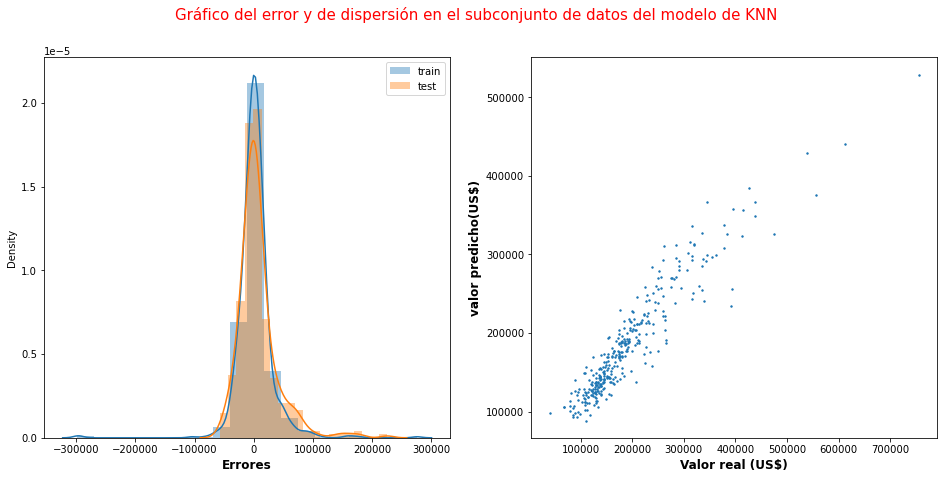

In [91]:
plt.figure(figsize = (16,7))
plt.suptitle('Gráfico del error y de dispersión en el subconjunto de datos del modelo de KNN', fontsize= 15, color='red')

plt.subplot (1,2,1)

sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('Errores', fontweight = "black", fontsize = 12)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test,y_test_pred, s =2)
plt.xlabel('Valor real (US$)', fontweight = "black", fontsize = 12)
plt.ylabel('valor predicho(US$)', fontweight = "black", fontsize = 12)

#### ***ESTE PRIMER MODELO SE SIMPLIFICÓ UTILIZANDO SOLAMENTE LAS VARIABLES NUMÉRICAS. POSTERIORMENTE, SE INCORPORARÁN LAS VARIABLES CATEGÓRICAS UTILIZANDO UN ENCODER PARA QUE EL MODELO PUEDA TRABAJARLAS***